###  Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

Sommaire:

    Implementation d'un Neurone

    Implementation d'un Reseau de Neurone Utilisant une Gradient Descente

    Implementation d'un Reseau de Neurone Utilisant l'optimisation Adam

    Implementation d'un Reseau de Neurone Utilisant l'optimisation SGD Moment

    Implementation d'un Reseau de Neurone Utilisant l'optimisation RMSProp

    Implementation d'un Reseau de Neurone Utilisant l'optimisation AdaGrad

    Etude Comparative des differents models Implementés


### 1 Neurone

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)


def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print("accuracy_score",accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

Ce code implémente une fonction pour entraîner un neurone artificiel sur un ensemble de données d'entraînement.

La fonction prend en entrée deux tableaux numpy X et y contenant les données d'entraînement et leurs labels respectifs, ainsi que deux paramètres optionnels learning_rate et n_iter qui contrôlent la vitesse d'apprentissage et le nombre d'itérations pour entraîner le neurone.

La fonction initialise les poids W et le biais b à l'aide de la fonction initialisation, puis elle itère sur n_iter itérations pour entraîner le neurone. À chaque itération, elle calcule la prédiction A pour les entrées X en utilisant les poids W et le biais b actuels. Elle calcule ensuite le log loss entre la prédiction A et les labels y. Elle calcule également les gradients de la fonction de perte par rapport aux poids et au biais à l'aide de la fonction gradients. Enfin, elle met à jour les poids et le biais en utilisant les gradients et le taux d'apprentissage learning_rate.

La fonction stocke également la valeur de la fonction de perte pour chaque itération dans la liste Loss, qui est utilisée pour tracer la courbe d'apprentissage à la fin de l'entraînement.

La fonction renvoie les poids W et le biais b appris, ainsi que la courbe d'apprentissage (liste Loss). Elle affiche également le score d'exactitude (accuracy_score) de la prédiction finale sur les données d'entraînement.

dimensions de X: (1000, 2)
dimensions de y: (1000, 1)


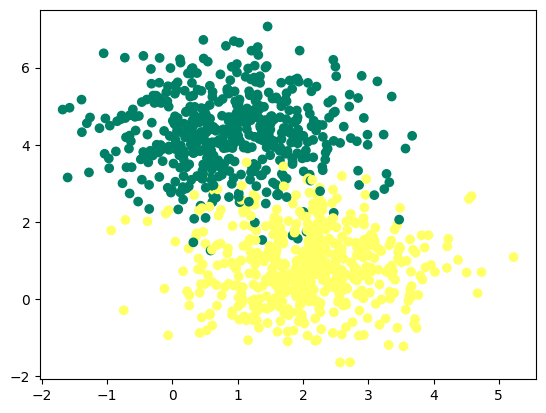

In [4]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

accuracy_score 0.945


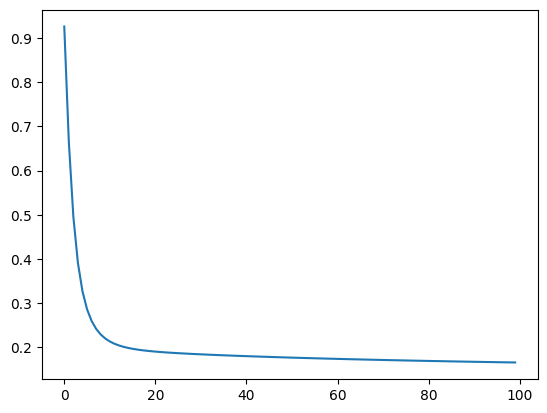

In [5]:
W, b = artificial_neuron(X, y)

#### Frontière de descion

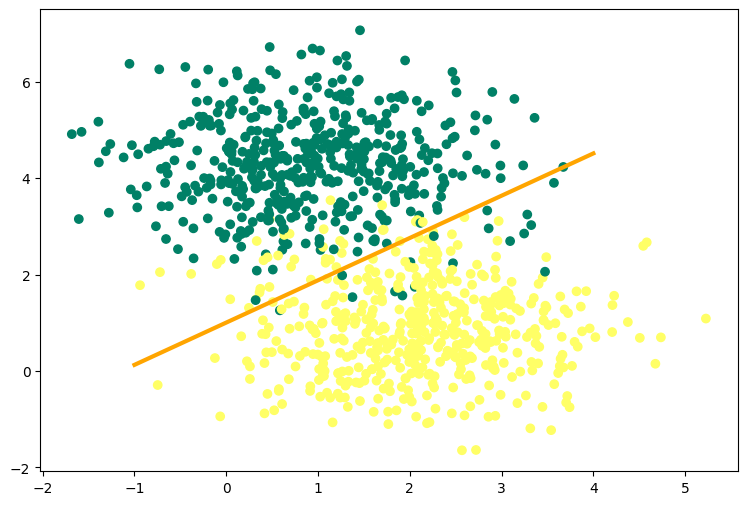

In [6]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

Le passage d'un neurone à un réseau de neurones représente une généralisation importante en apprentissage machine. En effet, si le neurone artificiel est capable de prendre en entrée un vecteur X et produire une sortie y, il ne peut pas capturer des structures complexes dans les données.

Le réseau de neurones est donc une extension naturelle du neurone artificiel, permettant d'implémenter un modèle plus complexe capable de capturer des structures non linéaires dans les données. Le réseau de neurones est composé de plusieurs couches de neurones qui se connectent entre eux. Chaque couche est composée d'un ensemble de neurones qui prennent en entrée les sorties des neurones de la couche précédente.

L'architecture du réseau de neurones est déterminée par le nombre de couches et le nombre de neurones dans chaque couche, spécifiés par l'argument "hidden_layers". Le modèle prend en entrée une matrice X et produit une sortie y, tout comme le modèle à un seul neurone.

Le processus d'apprentissage sera également plus complexe que dans le cas du neurone artificiel. Le modèle est entraîné à l'aide de la descente de gradient, mais cette fois-ci, le gradient est calculé pour tous les paramètres du modèle (poids et biais de chaque neurone) en utilisant la rétropropagation. L'ensemble du processus d'entraînement est effectué sur plusieurs itérations, déterminées par l'argument "n_iter".

En résumé, le passage d'un neurone à un réseau de neurones permet de capturer des structures non linéaires dans les données et de construire des modèles plus complexes. Cela ouvre la voie à de nombreuses applications en apprentissage machine, telles que la reconnaissance d'images, la classification de textes, la prédiction de séries temporelles, etc.

### Reseau de neuronne 

In [7]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres


def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

  return activations

def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

def log_lossbis(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [8]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_lossbis(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))
    return training_history , parametres ,activations,gradients

Voila une implémentation d'un réseau de neurones profond (deep neural network) pour la classification binaire en utilisant la descente de gradient comme algorithme d'optimisation. Voici les détails de chaque étape du code :

La fonction deep_neural_network prend en entrée X et y qui sont les données d'entrée et de sortie respectivement. 
hidden_layers est un tuple qui spécifie le nombre de neurones dans chaque couche cachée. 
learning_rate est le taux d'apprentissage et n_iter est le nombre d'itérations de l'algorithme d'optimisation.

Les dimensions du réseau sont calculées en ajoutant le nombre de neurones dans chaque couche à la liste dimensions.
Les paramètres du réseau (poids et biais) sont initialisés aléatoirement en utilisant la fonction initialisation.

Un tableau numpy training_history est initialisé pour stocker les valeurs d'accuracy et de log_loss à chaque itération de l'algorithme d'optimisation.
La variable C est initialisée avec le nombre de couches cachées dans le réseau.

La boucle for itère n_iter fois. À chaque itération, les activations sont calculées en utilisant la fonction forward_propagation. 
Les gradients sont calculés en utilisant la fonction back_propagation. Les paramètres du réseau sont mis à jour en utilisant la fonction update.
Les valeurs de l'accuracy et de la log_loss sont calculées à chaque itération à partir des sorties du réseau en utilisant les fonctions predict et log_lossbis.

La courbe d'apprentissage est affichée en utilisant la bibliothèque matplotlib.
Les sorties de la fonction sont:

training_history qui contient les valeurs d'accuracy et de log_loss

parametres qui contient les poids et les biais du réseau

activations qui contient les valeurs d'activation pour chaque couche et 

gradients qui contient les gradients pour chaque couche.

dimensions de X: (2, 10000)
dimensions de y: (1, 10000)


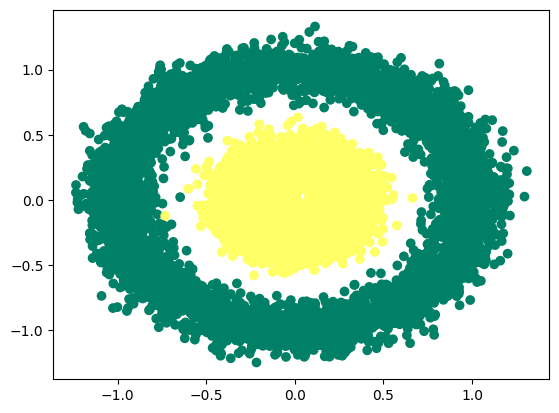

In [9]:
X, y = make_circles(n_samples=10000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [01:12<00:00, 41.62it/s]


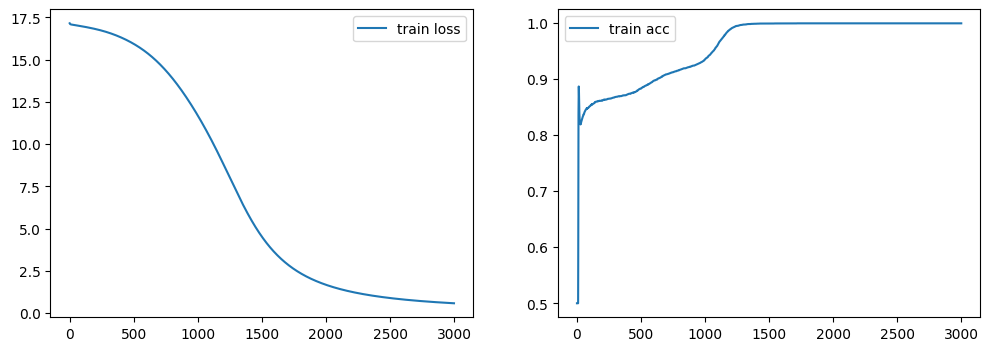

In [10]:
training_history , parametres ,activations,gradients=deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)
# Plot courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_history[:, 1], label='train acc')
plt.legend()
plt.show()

#### Frontière de descion

In [11]:
def plot_decision_boundary(X, y, parameters,fpredict=predict):
    # définir les limites du graphique
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # prédire les classes pour chaque point du graphique
    Z = fpredict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
    Z = Z.reshape(xx.shape)

    # tracer la frontière de décision
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()

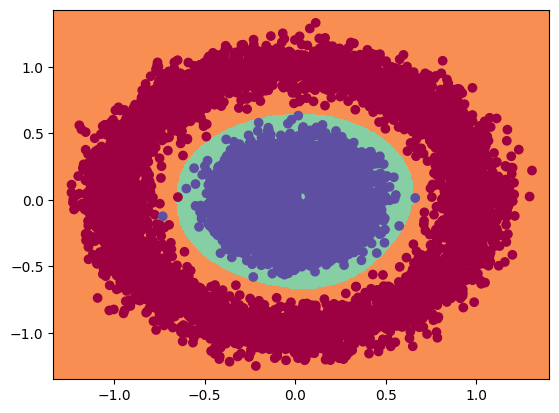

In [12]:
plot_decision_boundary(X, y, parametres)

### Avec Adam

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialisation_adam(dimensions):
    parameters = {}
    L = len(dimensions)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((dimensions[l], 1))
    
    return parameters


def initialize_adam(parameters):
    L = len(parameters) // 2
    v = {}
    s = {}

    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l + 1)].shape)
        v["db" + str(l + 1)] = np.zeros(parameters["b" + str(l + 1)].shape)
        s["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l + 1)].shape)
        s["db" + str(l + 1)] = np.zeros(parameters["b" + str(l + 1)].shape)

    return v, s

def update_parameters_adam(parameters, grads, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}

    for l in range(L):
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads["dW" + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads["db" + str(l + 1)]

        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))

        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.square(grads["dW" + str(l + 1)])
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.square(grads["db" + str(l + 1)])

        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))

        parameters["W" + str(l + 1)] -= learning_rate * v_corrected["dW" + str(l + 1)] / (np.sqrt(s_corrected["dW" + str(l + 1)]) + epsilon)
        parameters["b" + str(l + 1)] -= learning_rate * v_corrected["db" + str(l + 1)] / (np.sqrt(s_corrected["db" + str(l + 1)]) + epsilon)

    return parameters, v, s


In [14]:
def deep_neural_network_adam(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, n_iter=1500):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parameters = initialisation_adam(dimensions)

    training_history = np.zeros((int(n_iter), 2))

    v, s = initialize_adam(parameters)
    t = 0

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parameters)
        gradients = back_propagation(y, parameters, activations)

        t += 1
        parameters, v, s = update_parameters_adam(parameters, gradients, v, s, t, learning_rate)

        Af = activations['A' + str(len(parameters) // 2)]

        training_history[i, 0] = log_lossbis(y.flatten(), Af.flatten())
        y_pred = predict(X, parameters)
        training_history[i, 1] = accuracy_score(y.flatten(), y_pred.flatten())
    return training_history, parameters, activations, gradients


#### Explication :

Nous définisons une fonction deep_neural_network_adam qui prend en entrée une matrice de données X et un vecteur cible y. Cette fonction implémente un réseau de neurones à plusieurs couches utilisant l'algorithme d'optimisation Adam pour l'apprentissage des poids du modèle.

La fonction prend également en entrée des paramètres optionnels pour spécifier le nombre de neurones dans chaque couche cachée (hidden_layers), le taux d'apprentissage (learning_rate) et le nombre d'itérations (n_iter) pour l'apprentissage.

Le code commence par construire la liste des dimensions de chaque couche en utilisant la forme de la matrice d'entrée X et la forme du vecteur cible y. Ensuite, la graine aléatoire est fixée pour assurer la reproductibilité de l'apprentissage.

La fonction initialise ensuite les paramètres du réseau de neurones en appelant une autre fonction initialisation_adam qui retourne un dictionnaire contenant les poids et les biais de chaque couche.

Ensuite, la fonction initialise les variables nécessaires pour l'algorithme d'optimisation Adam, à savoir les vecteurs v et s et le compteur t.

La boucle principale de la fonction effectue un certain nombre d'itérations spécifiées par l'utilisateur. À chaque itération, la fonction effectue une propagation avant (forward_propagation) pour calculer les activations de chaque couche du réseau, puis une propagation arrière (back_propagation) pour calculer les gradients des poids et des biais.

La fonction met ensuite à jour les paramètres du réseau de neurones en utilisant l'algorithme d'optimisation Adam (update_parameters_adam) avec les gradients calculés, les vecteurs v et s, le compteur t et le taux d'apprentissage spécifié.

Enfin, la fonction calcule la perte (log_lossbis) et la précision (accuracy_score) sur l'ensemble de données d'entraînement à chaque itération et stocke les résultats dans un tableau training_history.

La fonction trace ensuite les courbes de perte et de précision en fonction du nombre d'itérations et retourne les résultats de l'apprentissage sous forme de tuple.

100%|██████████| 1500/1500 [00:34<00:00, 43.61it/s]


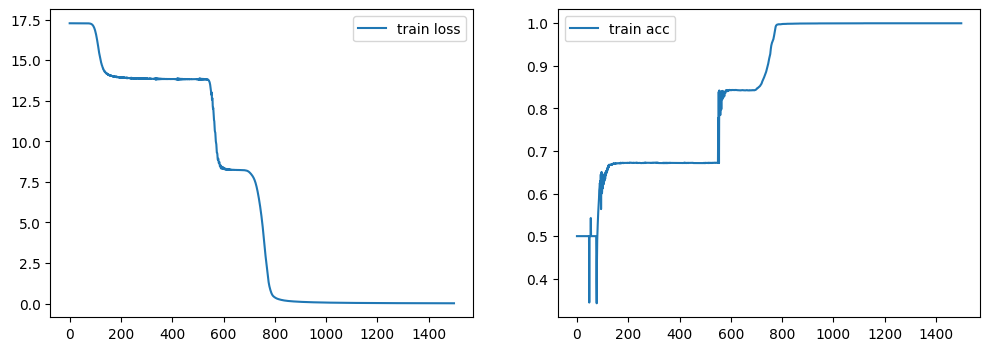

In [15]:
training_history_adam, parameters_adam, activations_adam, gradients_adam=deep_neural_network_adam(X, y, hidden_layers=(16, 16, 16), learning_rate=0.01, n_iter=1500)
# Plot courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_adam[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_history_adam[:, 1], label='train acc')
plt.legend()
plt.show()

#### Frontière de descion

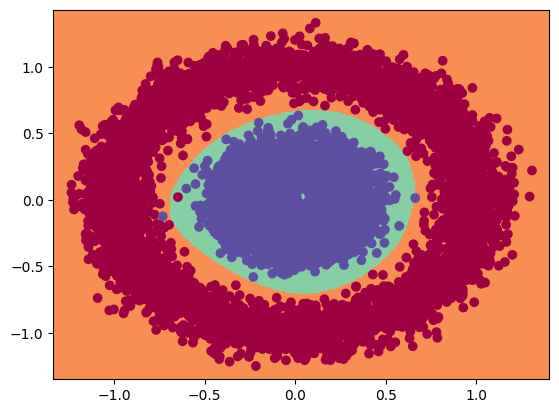

In [16]:
plot_decision_boundary(X, y, parameters_adam)

#### SGD Moment 

In [17]:
def initialisation_SGD_Moment(dimensions):
    parametres = {}
    C = len(dimensions)
    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
        parametres['VdW' + str(c)] = np.zeros((dimensions[c], dimensions[c - 1]))  # Ajout des termes de momentum pour les poids
        parametres['Vdb' + str(c)] = np.zeros((dimensions[c], 1))  # Ajout des termes de momentum pour les biais

    return parametres

def update_SGD_Moment(gradients, parametres, learning_rate, beta):
    C = len(parametres) // 4  # Modification de cette ligne pour tenir compte des termes de momentum ajoutés

    for c in range(1, C + 1):
        parametres['VdW' + str(c)] = beta * parametres['VdW' + str(c)] + (1 - beta) * gradients['dW' + str(c)]  # Mise à jour du momentum pour les poids
        parametres['Vdb' + str(c)] = beta * parametres['Vdb' + str(c)] + (1 - beta) * gradients['db' + str(c)]  # Mise à jour du momentum pour les biais
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * parametres['VdW' + str(c)]  # Utilisation du momentum pour mettre à jour les poids
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * parametres['Vdb' + str(c)]  # Utilisation du momentum pour mettre à jour les biais

    return parametres

def forward_propagation_SGD_Moment(X, parametres):
  activations = {'A0': X}
  C = len(parametres) // 4 # Modification de cette ligne pour tenir compte des termes de momentum ajoutés
  for c in range(1, C + 1):
    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
  return activations

def back_propagation_SGD_Moment(y, parametres, activations):
  m = y.shape[1]
  C = len(parametres) // 4  # Modification de cette ligne pour tenir compte des termes de momentum ajoutés
  dZ = activations['A' + str(C)] - y
  gradients = {}
  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
  return gradients

def predict_SGD_Moment(X, parametres):
  activations = forward_propagation_SGD_Moment(X, parametres)
  C = len(parametres) // 4 # Modification de cette ligne pour tenir compte des termes de momentum ajoutés
  Af = activations['A' + str(C)]
  return Af >= 0.5

def deep_neural_network_SGD_Moment(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, beta=0.9, n_iter=3000):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation_SGD_Moment(dimensions)
    training_history = np.zeros((int(n_iter), 2))
    C = len(parametres) // 4  # Modification de cette ligne pour tenir compte des termes de momentum ajoutés

    for i in tqdm(range(n_iter)):
        activations = forward_propagation_SGD_Moment(X, parametres)
        gradients = back_propagation_SGD_Moment(y, parametres, activations)
        parametres = update_SGD_Moment(gradients, parametres, learning_rate, beta)  # Ajout du paramètre beta pour le momentum
        Af = activations['A' + str(C)]
        training_history[i, 0] = (log_lossbis(y.flatten(), Af.flatten()))
        y_pred = predict_SGD_Moment(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))
    return training_history, parametres, activations, gradients

Cette implémentation est un reseau de neurones multicouche (deep neural network) avec la technique de descente de gradient stochastique (SGD) avec momentum. Le réseau est entrainé pour effectuer une classification binaire.

La fonction "initialisation_SGD_Moment" initialise les poids et les biais des couches cachées du réseau. Les poids sont initialisés avec des valeurs aléatoires distribuées selon une distribution normale centrée réduite, alors que les biais sont initialisés avec des valeurs aléatoires de la même distribution, mais avec une dimension correspondante à celle de la couche associée.

La fonction "update_SGD_Moment" met à jour les poids et les biais du réseau en utilisant la méthode de descente de gradient stochastique avec momentum. Le momentum est une technique qui permet d'accélérer la convergence en ajoutant une composante proportionnelle à l'historique des mises à jour précédentes. La mise à jour des poids et des biais est calculée en fonction de la combinaison du gradient et du momentum.

La fonction "forward_propagation_SGD_Moment" effectue la propagation avant du réseau en calculant les sorties des couches cachées et la sortie finale à partir des entrées du réseau.

La fonction "back_propagation_SGD_Moment" calcule les gradients des poids et des biais en utilisant la technique de rétropropagation de l'erreur, qui consiste à calculer l'erreur de sortie et à propager cette erreur en arrière dans le réseau en utilisant les poids des couches précédentes.

La fonction "predict_SGD_Moment" prédit les sorties du réseau en utilisant la fonction sigmoïde pour la couche de sortie et en appliquant une règle de décision pour les valeurs prédites.

La fonction "deep_neural_network_SGD_Moment" effectue l'apprentissage du réseau en utilisant les fonctions précédentes pour un nombre donné d'itérations. Elle retourne l'historique d'apprentissage, les paramètres finaux du réseau, les sorties de la dernière couche, et les gradients calculés pendant l'apprentissage.

100%|██████████| 2000/2000 [00:42<00:00, 47.11it/s]


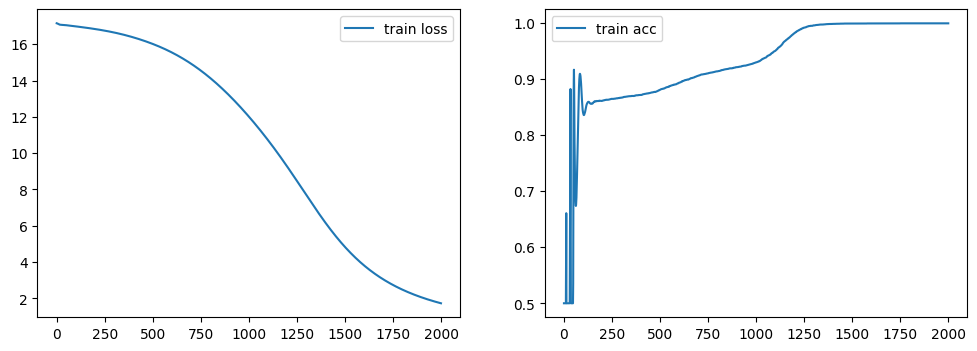

In [18]:
training_history_SGD_Moment, parameters_SGD_Moment, activations_SGD_Moment, gradients_SGD_Moment=deep_neural_network_SGD_Moment(X, y, hidden_layers=(16, 16, 16), learning_rate=0.1, beta=0.9, n_iter=2000)
# Plot courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_SGD_Moment[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_history_SGD_Moment[:, 1], label='train acc')
plt.legend()
plt.show()

#### Frontière de descion

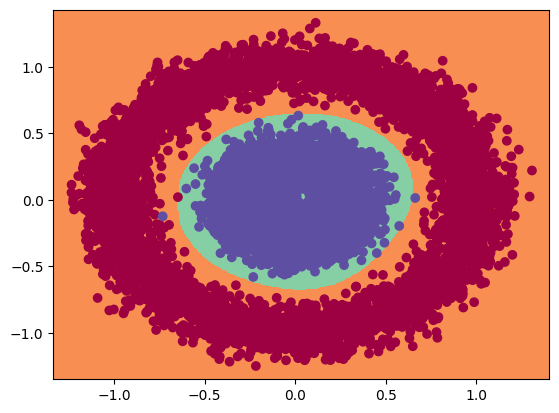

In [19]:
plot_decision_boundary(X, y, parameters_SGD_Moment,predict_SGD_Moment)

#### RMSProp 

In [20]:
def initialisation_RMSProp(dimensions):
    parametres = {}
    C = len(dimensions)
    np.random.seed(1)
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
        parametres['SdW' + str(c)] = np.zeros((dimensions[c], dimensions[c - 1]))  # Ajout des termes RMSProp pour les poids
        parametres['Sdb' + str(c)] = np.zeros((dimensions[c], 1))  # Ajout des termes RMSProp pour les biais
    return parametres

def update_RMSProp(gradients, parametres, learning_rate, beta, epsilon):
    C = len(parametres) // 4

    for c in range(1, C + 1):
        parametres['SdW' + str(c)] = beta * parametres['SdW' + str(c)] + (1 - beta) * (gradients['dW' + str(c)] ** 2)  # Mise à jour des termes RMSProp pour les poids
        parametres['Sdb' + str(c)] = beta * parametres['Sdb' + str(c)] + (1 - beta) * (gradients['db' + str(c)] ** 2)  # Mise à jour des termes RMSProp pour les biais
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)] / (np.sqrt(parametres['SdW' + str(c)]) + epsilon)  # Mise à jour des poids avec RMSProp
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)] / (np.sqrt(parametres['Sdb' + str(c)]) + epsilon)  # Mise à jour des biais avec RMSProp

    return parametres

def forward_propagation_RMSProp(X, parametres):
  activations = {'A0': X}
  C = len(parametres) // 4 # Modification de cette ligne pour tenir compte des termes de poids et de biais ajoutés
  for c in range(1, C + 1):
    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
  return activations

def back_propagation_RMSProp(y, parametres, activations):
  m = y.shape[1]
  C = len(parametres) // 4  # Modification de cette ligne pour tenir compte des termes de poids et de biais ajoutés
  dZ = activations['A' + str(C)] - y
  gradients = {}
  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
  return gradients

def predict_RMSProp(X, parametres):
  activations = forward_propagation_SGD_Moment(X, parametres)
  C = len(parametres) // 4 # Modification de cette ligne pour tenir compte des termes de poids et de biais ajoutés
  Af = activations['A' + str(C)]
  return Af >= 0.5

def deep_neural_network_RMSProp(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, beta=0.9, epsilon=1e-8, n_iter=3000):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation_RMSProp(dimensions)
    training_history = np.zeros((int(n_iter), 2))
    C = len(parametres) // 4

    for i in tqdm(range(n_iter)):
        activations = forward_propagation_RMSProp(X, parametres)
        gradients = back_propagation_RMSProp(y, parametres, activations)
        parametres = update_RMSProp(gradients, parametres, learning_rate, beta, epsilon)  # Ajout des paramètres beta et epsilon pour RMSProp
        Af = activations['A' + str(C)]
        training_history[i, 0] = (log_lossbis(y.flatten(), Af.flatten()))
        y_pred = predict_RMSProp(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))
    return training_history, parametres, activations, gradients


#### Explication :

Cette implémentation est un réseau de neurones multicouche (deep neural network) avec la technique de descente de gradient RMSProp. Le réseau est entrainé pour effectuer une classification binaire.

La fonction "initialisation_RMSProp" initialise les poids et les biais des couches cachées du réseau. Les poids sont initialisés avec des valeurs aléatoires distribuées selon une distribution normale centrée réduite, alors que les biais sont initialisés avec des valeurs aléatoires de la même distribution, mais avec une dimension correspondante à celle de la couche associée. En outre, elle initialise également les termes de RMSProp à zéro pour les poids et les biais.

La fonction "update_RMSProp" met à jour les poids et les biais du réseau en utilisant la méthode de descente de gradient RMSProp. RMSProp est une technique de descente de gradient qui adapte le taux d'apprentissage de chaque paramètre en fonction des gradients précédents en utilisant des moyennes mobiles pondérées des carrés des gradients. La mise à jour des poids et des biais est calculée en utilisant les termes de RMSProp mis à jour et en ajoutant un petit terme de régularisation (epsilon) pour éviter la division par zéro.

Les fonctions "forward_propagation_RMSProp", "back_propagation_RMSProp" et "predict_RMSProp" ont le même fonctionnement que les fonctions homologues utilisées dans l'implémentation précédente.

La fonction "deep_neural_network_RMSProp" effectue l'apprentissage du réseau en utilisant les fonctions précédentes pour un nombre donné d'itérations. Elle retourne l'historique d'apprentissage, les paramètres finaux du réseau, les sorties de la dernière couche, et les gradients calculés pendant l'apprentissage. Les paramètres supplémentaires "beta" et "epsilon" sont utilisés pour la méthode RMSProp pour régler les coefficients d'adaptation et éviter la division par zéro respectivement.

100%|██████████| 1500/1500 [00:30<00:00, 48.42it/s]


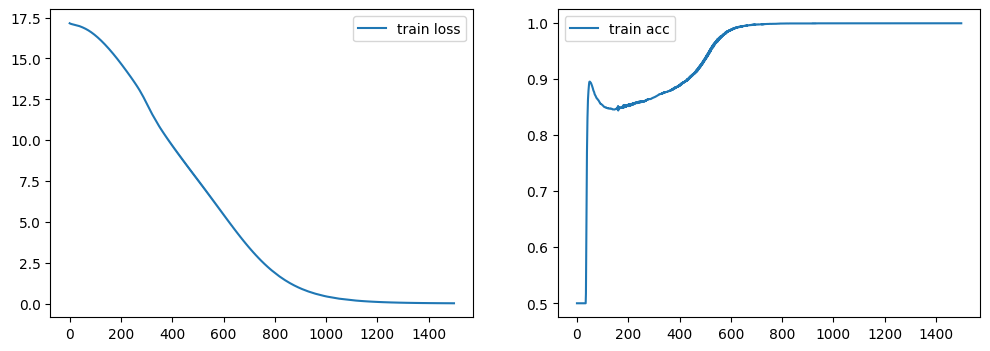

In [21]:
training_history_RMSProp, parametres_RMSProp, activations_RMSProp, gradients_RMSProp=deep_neural_network_RMSProp(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, beta=0.9, epsilon=1e-8, n_iter=1500)
# Plot courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_RMSProp[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_history_RMSProp[:, 1], label='train acc')
plt.legend()
plt.show()

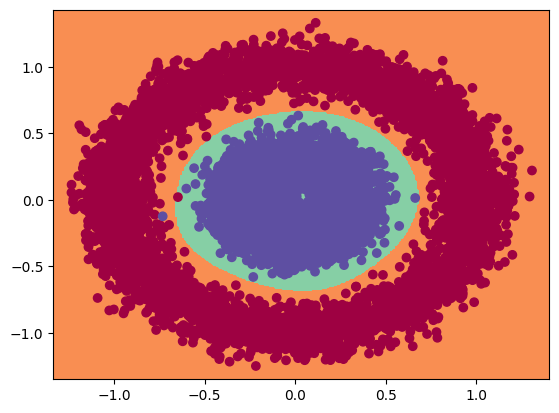

In [22]:
plot_decision_boundary(X, y, parametres_RMSProp,predict_RMSProp)

#### AdaGrad 

In [23]:
def initialisation_AdaGrad(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
        parametres['GdW' + str(c)] = np.zeros((dimensions[c], dimensions[c - 1]))  # Ajout des termes AdaGrad pour les poids
        parametres['Gdb' + str(c)] = np.zeros((dimensions[c], 1))  # Ajout des termes AdaGrad pour les biais

    return parametres

def update_AdaGrad(gradients, parametres, learning_rate, epsilon):
    C = len(parametres) // 4

    for c in range(1, C + 1):
        parametres['GdW' + str(c)] += gradients['dW' + str(c)] ** 2  # Mise à jour des termes AdaGrad pour les poids
        parametres['Gdb' + str(c)] += gradients['db' + str(c)] ** 2  # Mise à jour des termes AdaGrad pour les biais
        parametres['W' + str(c)] -= learning_rate * gradients['dW' + str(c)] / (np.sqrt(parametres['GdW' + str(c)]) + epsilon)  # Mise à jour des poids avec AdaGrad
        parametres['b' + str(c)] -= learning_rate * gradients['db' + str(c)] / (np.sqrt(parametres['Gdb' + str(c)]) + epsilon)  # Mise à jour des biais avec AdaGrad

    return parametres

def forward_propagation_AdaGrad(X, parametres):
  activations = {'A0': X}
  C = len(parametres) // 4 # Modification de cette ligne pour tenir compte des termes de poids et de biais ajoutés
  for c in range(1, C + 1):
    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
  return activations

def back_propagation_AdaGrad(y, parametres, activations):
  m = y.shape[1]
  C = len(parametres) // 4  # Modification de cette ligne pour tenir compte des termes de poids et de biais ajoutés
  dZ = activations['A' + str(C)] - y
  gradients = {}
  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
  return gradients

def predict_AdaGrad(X, parametres):
  activations = forward_propagation_SGD_Moment(X, parametres)
  C = len(parametres) // 4 # Modification de cette ligne pour tenir compte des termes de poids et de biais ajoutés
  Af = activations['A' + str(C)]
  return Af >= 0.5

def deep_neural_network_AdaGrad(X, y, hidden_layers=(16, 16, 16), learning_rate=0.001, epsilon=1e-8, n_iter=3000):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation_AdaGrad(dimensions)
    training_history = np.zeros((int(n_iter), 2))
    C = len(parametres) // 4

    for i in tqdm(range(n_iter)):
        activations = forward_propagation_AdaGrad(X, parametres)
        gradients = back_propagation_AdaGrad(y, parametres, activations)
        parametres = update_AdaGrad(gradients, parametres, learning_rate, epsilon)  # Ajout du paramètre epsilon pour AdaGrad
        Af = activations['A' + str(C)]
        training_history[i, 0] = (log_lossbis(y.flatten(), Af.flatten()))
        y_pred = predict_AdaGrad(X, parametres)
        training_history[i,1] = (accuracy_score(y.flatten(), y_pred.flatten()))
    return training_history, parametres, activations, gradients
   


#### Explication :

Ce code implémente un algorithme de descente de gradient stochastique avec la méthode AdaGrad pour entraîner un réseau de neurones profond.

La fonction initialisation_AdaGrad initialise les paramètres du réseau (poids, biais et termes AdaGrad) à l'aide d'une distribution aléatoire.

La fonction update_AdaGrad met à jour les paramètres du réseau en utilisant la méthode AdaGrad, qui consiste à diviser le gradient de chaque paramètre par la racine carrée de la somme des carrés des gradients passés pour ce paramètre. Cette technique permet d'adapter le taux d'apprentissage pour chaque paramètre en fonction de sa "popularité" dans les données, et donc de mieux gérer les gradients de grande amplitude.

Les fonctions forward_propagation_AdaGrad, back_propagation_AdaGrad et predict_AdaGrad implémentent la propagation avant, la rétropropagation et la prédiction du réseau de neurones, respectivement.

Enfin, la fonction deep_neural_network_AdaGrad combine les fonctions précédentes pour entraîner le réseau de neurones en utilisant la méthode AdaGrad. Elle effectue un certain nombre d'itérations de la descente de gradient stochastique, stocke les résultats dans un historique d'entraînement, et retourne les paramètres finaux, les activations, les gradients et l'historique d'entraînement.

100%|██████████| 3000/3000 [01:02<00:00, 47.78it/s]


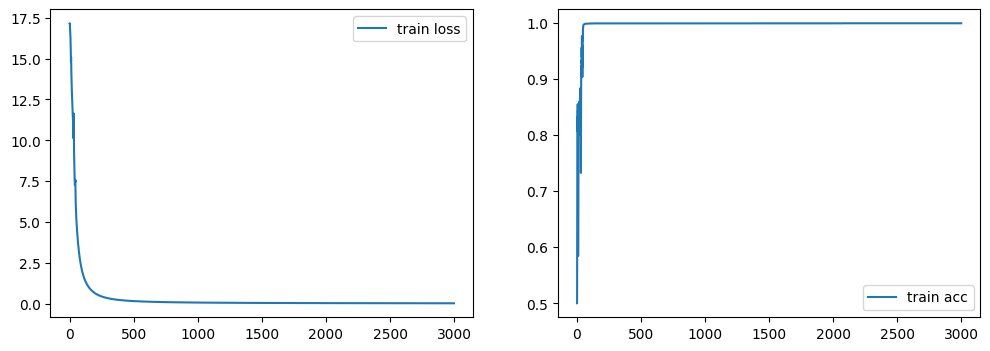

In [24]:
training_history_AdaGrad, parametres_AdaGrad, activations_AdaGrad, gradients_AdaGrad=deep_neural_network_AdaGrad(X, y, hidden_layers=(16, 16, 16), learning_rate=0.1, epsilon=1e-8, n_iter=3000)
# Plot courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_AdaGrad[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_history_AdaGrad[:, 1], label='train acc')
plt.legend()
plt.show()

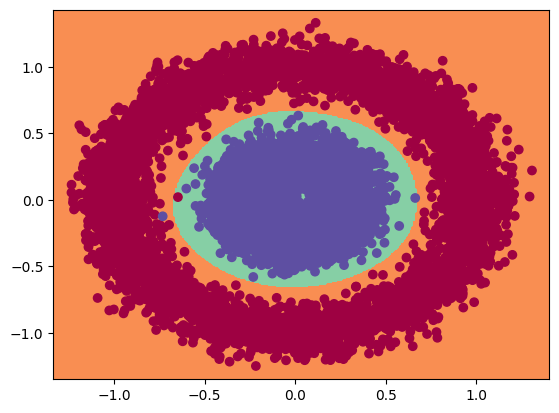

In [25]:
plot_decision_boundary(X, y, parametres_AdaGrad,predict_AdaGrad)

#### Etude Comparative

In [58]:
import time

def make_key(alpha,n_sample,layer):
    key=str(alpha)+"|"+str(n_sample)+"|"+str(layer)
    return key
def unmake_key(key):
    unkey=key.split("|")
    return unkey
    

def secondes_en_hms(secondes):
    heures = int(secondes / 3600)
    minutes = int((secondes % 3600) / 60)
    secondes_restantes = int(secondes % 60)
    return "{:02d}:{:02d}:{:02d}".format(heures, minutes, secondes_restantes)


def get_time(func, *args, **kwargs):
    start_time = time.time()
    training_history, parametres, activations, gradients= func(*args, **kwargs)
    end_time = time.time()
    return secondes_en_hms(end_time - start_time) , [training_history, parametres, activations, gradients]

def get_n_iter_until_Conv(liste,conv):
    for i in range(len(liste)):
        if liste[i] < conv:
            return i
    return -1


def etude_comparative(learning_rate_List,n_samples_List,hidden_layers_list,seuil_conv=0.5):
    start_time = time.time()
    result={}
    for learning_rate in learning_rate_List :
        for n_samples in n_samples_List :
            for hidden_layers in hidden_layers_list:
                X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.3, random_state=0)
                X = X.T
                y = y.reshape((1, y.shape[0]))
                Models={
                "RN":{"fn":deep_neural_network,
                    "kwargs":{"X":X, "y":y, "hidden_layers" : hidden_layers, "learning_rate" : learning_rate, "n_iter" : 3000}},
                "adam":{"fn":deep_neural_network_adam,
                    "kwargs":{"X":X, "y":y, "hidden_layers" : hidden_layers, "learning_rate" : learning_rate, "n_iter" : 3000}},
                "SGD_Moment":{"fn":deep_neural_network_SGD_Moment,
                    "kwargs":{"X":X, "y":y, "hidden_layers" : hidden_layers, "learning_rate" : learning_rate, "n_iter" : 3000,"beta":0.9}},
                "RMSProp":{"fn":deep_neural_network_RMSProp,
                    "kwargs":{"X":X, "y":y, "hidden_layers" : hidden_layers, "learning_rate" : learning_rate,"beta":0.9, "epsilon":1e-8, "n_iter" : 3000}}
                }
                for Model in Models:
                    Models[Model]["Time"],result_fn = get_time(Models[Model]["fn"],**Models[Model]["kwargs"])
                    Models[Model]["training_history_loss"]=list(result_fn[0][:, 0])
                    Models[Model]["training_history_acc"]=list(result_fn[0][:, 1])
                    Models[Model]["n_iter_until_Conv"] = get_n_iter_until_Conv(Models[Model]["training_history_loss"],seuil_conv)
                    Models[Model]["parametres"]={}
                    for param in result_fn[1]:
                        Models[Model]["parametres"][param]=result_fn[1][param]

                    
                result[make_key(learning_rate,n_samples,hidden_layers)]=Models
    end_time = time.time()
    log_time=secondes_en_hms(end_time - start_time)
    return result,log_time

La fonction etude_comparative effectue une étude comparative de plusieurs modèles de réseaux de neurones de différents types (RN, adam, SGD_Moment, RMSProp) en utilisant différents hyperparamètres (learning_rate_List, n_samples_List, hidden_layers_list).

Pour chaque combinaison d'hyperparamètres, la fonction crée un jeu de données et entraîne chaque modèle avec les mêmes données d'entrée et les mêmes hyperparamètres. Elle enregistre les performances de chaque modèle (temps d'entraînement, historique de perte, historique de précision, nombre d'itérations avant convergence, paramètres, activations, gradients) dans un dictionnaire result en utilisant une clé unique générée à partir des hyperparamètres.

In [27]:
learning_rate_List=[0.1,0.01,0.001]
n_samples_List=[100,1000,10000]
layer1=(4,4,4)
layer2=(8,8,8)
layer3=(16,16,16)
hidden_layers_list=[layer1,layer2,layer3]

In [59]:
Résultat,log_time = etude_comparative(learning_rate_List,n_samples_List,hidden_layers_list,seuil_conv=0.5)

100%|██████████| 3000/3000 [00:59<00:00, 50.35it/s]


In [60]:
print("Durée d'exécution :",log_time)

Durée d'exécution : 00:22:55


In [61]:
layer1=(4,4,4)
layer2=(8,8,8)
layer3=(16,16,16)

def data_cleaning(new_etude):
    etude = dict(new_etude)
    for alpha in learning_rate_List:
        for n_sample in n_samples_List:
            for layer in hidden_layers_list:
                curr_key=make_key(alpha,n_sample,layer)
                for model in etude[curr_key]:
                    etude[curr_key][model]["fn"]=model 
                    etude[curr_key][model]["kwargs"]["X"]=None
                    etude[curr_key][model]["kwargs"]["y"]=None
    return etude
                
                

Obligatoire :

In [62]:
import pickle
my_variable=data_cleaning(Résultat)
with open('../my_variable.pkl', 'wb') as f:
    pickle.dump(my_variable, f)


Falcultatif si vous voulez explorer le json

In [ ]:
import json
# Conversion en JSON
json_data = json.dumps(my_variable)

# Ecriture dans un fichier
with open("Resultat-Etude-OptimisationConvexV2.json", "w") as f:
    f.write(json_data)
